In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
embarazos_raw = pd.read_csv('../data/raw/CSV/embarazos.csv')

In [3]:
embarazos_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 241 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    Abortos                                float64
 1    alumbramiento completo                 object 
 2    alumbramiento esp                      object 
 3    Anemia Cr                              object 
 4    Apgar                                  object 
 5    APP                                    object 
 6    Cantidad cigarrillos diaria            float64
 7    Cesareas                               float64
 8    Chagas                                 object 
 9    Cita 1 AU                              float64
 10   Cita 1 Comentarios                     object 
 11   Cita 1 EG Definitiva                   float64
 12   Cita 1 Fecha                           object 
 13   Cita 1 Incremento de Peso Materno      float64
 14   Cita 1 LCF                             o

In [4]:
embarazos_raw.head(20)

,Abortos,alumbramiento completo,alumbramiento esp,Anemia Cr,Apgar,APP,Cantidad cigarrillos diaria,Cesareas,Chagas,Cita 1 AU,...,Urocultivo 3,Vacuna Triple B Acelular,Vaginales,Valor Prueba de carga,Valoracion Cardiologica Prequirurgica,VDRL,VDRL 2,VDRL 3,VHB en embarazo,VHC en embarazo
0,0.0,Si,Si,Si,8/9,No,NaN,0.0,Negativo,NaN,...,NaN,NaN,0.0,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
1,NaN,Si,Si,No,NaN,No,NaN,NaN,Negativo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,NaN
2,0.0,Si,Si,No,NaN,No,NaN,0.0,Negativo,NaN,...,NaN,NaN,0.0,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
3,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,NaN,...,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,Negativo,NaN
4,NaN,Si,Si,No,8/9,No,NaN,NaN,Negativo,NaN,...,NaN,NaN,NaN,NaN,NaN,Neg.,Neg.,NaN,Negativo,Negativo
5,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,NaN,...,NaN,NaN,NaN,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
7,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,NaN,...,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,Negativo,Negativo


In [5]:
embarazos_raw.describe()

,Abortos,Cantidad cigarrillos diaria,Cesareas,Cita 1 AU,Cita 1 EG Definitiva,Cita 1 Incremento de Peso Materno,Cita 1 Peso Materno,Cita 1 TA Diastolica,Cita 1 TA Sistolica,Cita 10 AU,...,Hb 1,Hb 2,Hb 3,Orden de embarazos,Peso Inicial,Peso RN,Semana de EGB,TSH en embarazo,Vaginales,Valor Prueba de carga
count,126.000000,0.0,145.000000,1.0,183.000000,28.000000,28.000000,28.000000,28.000000,2.000000,...,166.000000,133.000000,89.000000,226.000000,181.000000,103.000000,78.000000,157.000000,116.000000,115.000000
mean,0.595238,NaN,0.468966,29.0,121.284153,3.321429,66.678571,65.928571,114.678571,35.500000,...,13.046988,11.316541,11.293258,1.146018,65.385083,3200.776699,35.584615,18.780382,0.232759,3.660696
std,1.021204,NaN,0.717395,NaN,93.973378,4.401292,11.376596,8.236902,12.852593,0.707107,...,9.250767,0.827114,0.979656,0.411941,14.243823,500.269906,0.644069,72.150157,0.481984,19.838419
min,0.000000,NaN,0.000000,29.0,45.000000,-2.500000,43.900000,50.000000,100.000000,35.000000,...,9.300000,9.100000,8.500000,1.000000,39.000000,1700.000000,33.000000,0.040000,0.000000,0.500000
25%,0.000000,NaN,0.000000,29.0,63.000000,0.375000,58.075000,60.000000,105.000000,35.250000,...,11.800000,10.700000,10.600000,1.000000,56.500000,3000.000000,35.000000,1.230000,0.000000,0.870000
50%,0.000000,NaN,0.000000,29.0,74.000000,2.050000,66.250000,64.500000,114.500000,35.500000,...,12.350000,11.400000,11.400000,1.000000,62.000000,3280.000000,36.000000,2.010000,0.000000,1.010000
75%,1.000000,NaN,1.000000,29.0,134.000000,4.500000,73.500000,69.250000,120.250000,35.750000,...,12.900000,11.900000,11.900000,1.000000,72.000000,3500.000000,36.000000,3.130000,0.000000,1.160000
max,5.000000,NaN,5.000000,29.0,390.000000,16.000000,94.400000,88.000000,159.000000,36.000000,...,131.000000,13.500000,14.000000,4.000000,127.000000,4400.000000,37.000000,515.000000,2.000000,158.000000


In [6]:
embarazos_raw.shape

(230, 241)

In [7]:
# Me doy uenta que las observacions (registros) no tienen indice. Creo una columna con el ID correlativo ascendente. 
embarazos_raw.reset_index(inplace=True)
embarazos_raw.rename(columns={'index':'ID'}, inplace=True)

In [8]:
embarazos_raw.head(20)

,ID,Abortos,alumbramiento completo,alumbramiento esp,Anemia Cr,Apgar,APP,Cantidad cigarrillos diaria,Cesareas,Chagas,...,Urocultivo 3,Vacuna Triple B Acelular,Vaginales,Valor Prueba de carga,Valoracion Cardiologica Prequirurgica,VDRL,VDRL 2,VDRL 3,VHB en embarazo,VHC en embarazo
0,0,0.0,Si,Si,Si,8/9,No,NaN,0.0,Negativo,...,NaN,NaN,0.0,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
1,1,NaN,Si,Si,No,NaN,No,NaN,NaN,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,NaN
2,2,0.0,Si,Si,No,NaN,No,NaN,0.0,Negativo,...,NaN,NaN,0.0,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
3,3,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,...,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,Negativo,NaN
4,4,NaN,Si,Si,No,8/9,No,NaN,NaN,Negativo,...,NaN,NaN,NaN,NaN,NaN,Neg.,Neg.,NaN,Negativo,Negativo
5,5,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,...,NaN,NaN,NaN,NaN,NaN,Neg.,Neg.,NaN,Negativo,NaN
7,7,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,NaN,NaN,NaN,No,NaN,No,NaN,NaN,Negativo,...,NaN,NaN,NaN,NaN,NaN,Neg.,NaN,NaN,Negativo,Negativo


In [9]:
embarazos_raw['Cita 6 EG Definitiva'].value_counts()

221.0    5
220.0    4
260.0    3
233.0    3
215.0    3
        ..
273.0    1
230.0    1
285.0    1
344.0    1
266.0    1
Name: Cita 6 EG Definitiva, Length: 74, dtype: int64

In [10]:
embarazos_raw['Peso RN'].value_counts()

3300.0    10
3100.0     7
3250.0     4
3200.0     4
3050.0     3
3700.0     3
2900.0     3
2700.0     3
3370.0     2
3400.0     2
3290.0     2
3360.0     2
3350.0     2
3590.0     2
4400.0     2
3500.0     2
2100.0     2
3900.0     2
3580.0     2
3280.0     2
3150.0     2
2080.0     2
3570.0     2
3780.0     2
3110.0     1
3730.0     1
3770.0     1
2970.0     1
3820.0     1
3450.0     1
2620.0     1
2450.0     1
4050.0     1
2140.0     1
3440.0     1
3610.0     1
3340.0     1
2810.0     1
2830.0     1
2300.0     1
2910.0     1
2990.0     1
4200.0     1
2820.0     1
1700.0     1
3530.0     1
2650.0     1
3460.0     1
2180.0     1
2000.0     1
3010.0     1
3230.0     1
2670.0     1
3740.0     1
3260.0     1
3600.0     1
2800.0     1
3540.0     1
Name: Peso RN, dtype: int64

In [11]:
# tengo que comprobar si el numero de EG definitiva se corresponde con edad gestacional.
# Enla base de datos ese campo se completa con un calculo automatico que es un f string entre texto y numero. "30 sem y 4 dias"
# Compruebo en un caso al azar a traves de la busqueda en la base de datos por el nombre de bebe "Federica" que es registro unico,
# que la exportacion se hace en float, cuyos dos primeros digitos corresponden a la semana, y el ultimo corresponde al dia.
# Me doy cuenta que no necesito hacer ninguna transformacion, aparte de pasarlo a int, porque puedo trabajar con ese dato perfectamente
embarazos_raw.loc[(embarazos_raw['Nombre RN']  == 'FEDERICA')].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 35 to 190
Data columns (total 242 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    ID                                     int64  
 1    Abortos                                float64
 2    alumbramiento completo                 object 
 3    alumbramiento esp                      object 
 4    Anemia Cr                              object 
 5    Apgar                                  object 
 6    APP                                    object 
 7    Cantidad cigarrillos diaria            float64
 8    Cesareas                               float64
 9    Chagas                                 object 
 10   Cita 1 AU                              float64
 11   Cita 1 Comentarios                     object 
 12   Cita 1 EG Definitiva                   float64
 13   Cita 1 Fecha                           object 
 14   Cita 1 Incremento de Peso Materno      fl

In [12]:
a = embarazos_raw.loc[(embarazos_raw['Nombre RN']  == 'FEDERICA') & (embarazos_raw['Cita 1 Incremento de Peso Materno'] == -1.8)]
a.loc[:,['ID','Cita 6 EG Definitiva', 'Cita 6 Incremento de Peso Materno']]

,ID,Cita 6 EG Definitiva,Cita 6 Incremento de Peso Materno
35,35,214.0,5.8


In [13]:
embarazos_raw.loc[(embarazos_raw['Nombre RN']  == 'FEDERICA') & (embarazos_raw['Cita 1 Incremento de Peso Materno'] == -1.8)]

,ID,Abortos,alumbramiento completo,alumbramiento esp,Anemia Cr,Apgar,APP,Cantidad cigarrillos diaria,Cesareas,Chagas,...,Urocultivo 3,Vacuna Triple B Acelular,Vaginales,Valor Prueba de carga,Valoracion Cardiologica Prequirurgica,VDRL,VDRL 2,VDRL 3,VHB en embarazo,VHC en embarazo
35,35,0.0,Si,Si,Si,9/10,No,NaN,0.0,Negativo,...,Neg.,Si,0.0,0.98,NORMAL,Neg.,Neg.,Neg.,Negativo,Negativo


In [14]:
cita_6 = embarazos_raw.loc[:,['Cita 6 EG Definitiva', 'Cita 6 Incremento de Peso Materno']]

In [15]:
embarazos_raw['Peso RN'].isnull().sum()

127

In [16]:
# # El codigo mas feo y menos automatizado del mundo. Pero si funciona....

# cita_1 = embarazos_raw.loc[:,['ID','Cita 1 EG Definitiva', 'Cita 1 Incremento de Peso Materno', 'Peso RN']]
# cita_1.rename(columns={'Cita 1 EG Definitiva':'EG','Cita 1 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_2 = embarazos_raw.loc[:,['ID','Cita 2 EG Definitiva', 'Cita 2 Incremento de Peso Materno', 'Peso RN']]
# cita_2.rename(columns={'Cita 2 EG Definitiva':'EG','Cita 2 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_3 = embarazos_raw.loc[:,['ID','Cita 3 EG Definitiva', 'Cita 3 Incremento de Peso Materno', 'Peso RN']]
# cita_3.rename(columns={'Cita 3 EG Definitiva':'EG','Cita 3 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_4 = embarazos_raw.loc[:,['ID','Cita 4 EG Definitiva', 'Cita 4 Incremento de Peso Materno', 'Peso RN']]
# cita_4.rename(columns={'Cita 4 EG Definitiva':'EG','Cita 4 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_5 = embarazos_raw.loc[:,['ID','Cita 5 EG Definitiva', 'Cita 5 Incremento de Peso Materno', 'Peso RN']]
# cita_5.rename(columns={'Cita 5 EG Definitiva':'EG','Cita 5 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_6 = embarazos_raw.loc[:,['ID','Cita 6 EG Definitiva', 'Cita 6 Incremento de Peso Materno', 'Peso RN']]
# cita_6.rename(columns={'Cita 6 EG Definitiva':'EG','Cita 6 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_7 = embarazos_raw.loc[:,['ID','Cita 7 EG Definitiva', 'Cita 7 Incremento de Peso Materno', 'Peso RN']]
# cita_7.rename(columns={'Cita 7 EG Definitiva':'EG','Cita 7 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_8 = embarazos_raw.loc[:,['ID','Cita 8 EG Definitiva', 'Cita 8 Incremento de Peso Materno', 'Peso RN']]
# cita_8.rename(columns={'Cita 8 EG Definitiva':'EG','Cita 8 Incremento de Peso Materno':'Incr_peso'}, inplace=True)
# cita_9 = embarazos_raw.loc[:,['ID','Cita 9 EG Definitiva', 'Cita 9 Incremento de Peso Materno', 'Peso RN']]
# cita_9.rename(columns={'Cita 9 EG Definitiva':'EG','Cita 9 Incremento de Peso Materno':'Incr_peso'}, inplace=True)

In [17]:
#Lo anterior funcionó, termine el notebook con ello. Pero le pedi con el chat que lo mejore. 
#Sabia como empezar el bucle for, pero me trabe con el f string, y con la "auto"concatenacion...

In [18]:
citas = ['Cita 1', 'Cita 2', 'Cita 3', 'Cita 4', 'Cita 5', 'Cita 6', 'Cita 7', 'Cita 8', 'Cita 9']
citas_concat = pd.DataFrame()
for i, cita in enumerate(citas):
    cita_df = embarazos_raw.loc[:,['ID',f'{cita} EG Definitiva', f'{cita} Incremento de Peso Materno', 'Peso RN']]
    cita_df.rename(columns={f'{cita} EG Definitiva':'EG',f'{cita} Incremento de Peso Materno':'Incr_peso'}, inplace=True)
    citas_concat = pd.concat([citas_concat, cita_df], axis=0)

In [19]:
# citas_concat = pd.concat([cita_1, cita_2, cita_3, cita_4, cita_5, cita_6, cita_7, cita_8, cita_9], axis=0)
citas_concat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 229
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2070 non-null   int64  
 1   EG         1126 non-null   float64
 2   Incr_peso  556 non-null    float64
 3   Peso RN    927 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 80.9 KB


In [20]:
step1 = citas_concat[citas_concat['Incr_peso'].notnull()]

In [21]:
step1.shape

(556, 4)

In [22]:
step1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 35 to 215
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         556 non-null    int64  
 1   EG         556 non-null    float64
 2   Incr_peso  556 non-null    float64
 3   Peso RN    392 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 21.7 KB


In [23]:
step2 = step1[step1['Peso RN'].notnull()]

In [24]:
step2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 35 to 195
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         392 non-null    int64  
 1   EG         392 non-null    float64
 2   Incr_peso  392 non-null    float64
 3   Peso RN    392 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


In [25]:
step2.loc[:,['EG', 'Peso RN']] = step2[['EG', 'Peso RN']].astype(int)

c:\Users\Rafael Ortega\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [26]:
step2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 35 to 195
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         392 non-null    int64  
 1   EG         392 non-null    int32  
 2   Incr_peso  392 non-null    float64
 3   Peso RN    392 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 12.2 KB


In [27]:
step3 = step2.sort_values(by=['ID','EG'])
step3.head(30)

,ID,EG,Incr_peso,Peso RN
34,34,122,1.1,3530
34,34,202,3.9,3530
34,34,270,6.1,3530
34,34,300,7.6,3530
34,34,330,8.4,3530
34,34,350,9.1,3530
34,34,370,9.4,3530
35,35,62,-1.8,3250
35,35,72,-0.8,3250
35,35,112,0.2,3250


In [28]:
step3.nunique()

ID            80
EG           176
Incr_peso    164
Peso RN       51
dtype: int64

In [29]:
# Voy a filtrar las EG entre 28 y 32 (280 y 320). La idea es tener un solo peso por ID.
mask = (step3['EG'] >= 280) & (step3['EG'] <= 320)
step4 = step3.loc[mask]
step4.head(30)

,ID,EG,Incr_peso,Peso RN
34,34,300,7.6,3530
35,35,311,9.2,3250
36,36,306,10.2,4400
41,41,313,14.7,3100
46,46,316,12.6,2910
47,47,305,11.0,2180
49,49,316,8.6,3580
52,52,296,4.2,2670
54,54,296,3.6,3100
55,55,305,9.8,3780


In [30]:
step4[step4['Incr_peso'] > 30]

,ID,EG,Incr_peso,Peso RN
123,123,281,30.5,3300


In [31]:
step4.nunique()

ID           56
EG           27
Incr_peso    56
Peso RN      41
dtype: int64

In [32]:
# Como hay algunos ID que tienen dos observaciones en la ventana 28-32 sem, las unifico con el promedio. De esa manera tengo una observacion por cada ID.
step4['promedio_incr_peso'] = step4.groupby('ID')['Incr_peso'].mean()
step4.head(40)

C:\Users\Rafael Ortega\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,EG,Incr_peso,Peso RN,promedio_incr_peso
34,34,300,7.6,3530,7.60
35,35,311,9.2,3250,9.20
36,36,306,10.2,4400,10.20
41,41,313,14.7,3100,14.70
46,46,316,12.6,2910,12.60
47,47,305,11.0,2180,11.00
49,49,316,8.6,3580,8.60
52,52,296,4.2,2670,4.20
54,54,296,3.6,3100,3.60
55,55,305,9.8,3780,9.80


In [33]:
# Elimino los ID duplicados.


step5 = step4.drop_duplicates(subset='ID', keep='first')
step5.head()

,ID,EG,Incr_peso,Peso RN,promedio_incr_peso
34,34,300,7.6,3530,7.6
35,35,311,9.2,3250,9.2
36,36,306,10.2,4400,10.2
41,41,313,14.7,3100,14.7
46,46,316,12.6,2910,12.6


In [35]:
# Ahora si tengo lo que quiero. Puedo relacionar el incremento de peso entre la sem 28 y 32, con el peso del RN!
# Le saco las columnas que no me sirven para los graficos.

step6 = step5.loc[:,['promedio_incr_peso', 'Peso RN']]
step6.head()

step6.to_csv('Embarazos_processed.csv')



In [ ]:
step6.describe()

,promedio_incr_peso,Peso RN
count,56.000000,56.000000
mean,10.041964,3200.535714
std,4.551411,484.608257
min,2.000000,2000.000000
25%,7.900000,3030.000000
50%,9.750000,3295.000000
75%,11.725000,3532.500000
max,30.500000,4400.000000


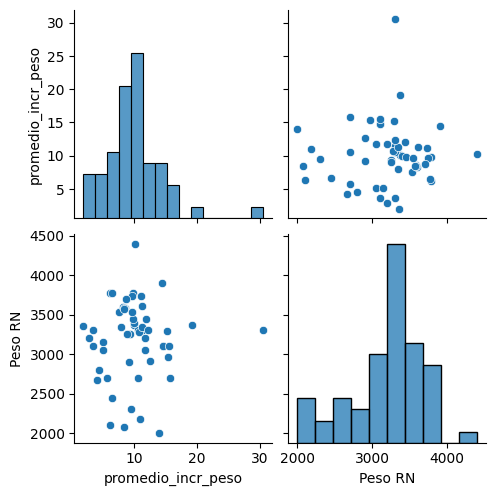

In [ ]:
sns.pairplot(step6)

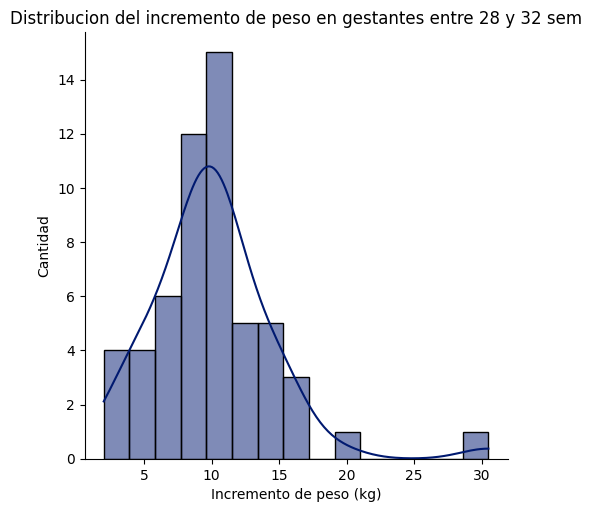

In [ ]:
sns.displot(step6['promedio_incr_peso'], kde=True, color='#001970')
plt.xlabel('Incremento de peso (kg)')
plt.ylabel('Cantidad')
plt.title('Distribucion del incremento de peso en gestantes entre 28 y 32 sem')
plt.savefig('Distribucion por incremento de peso 28-32 sem.png')

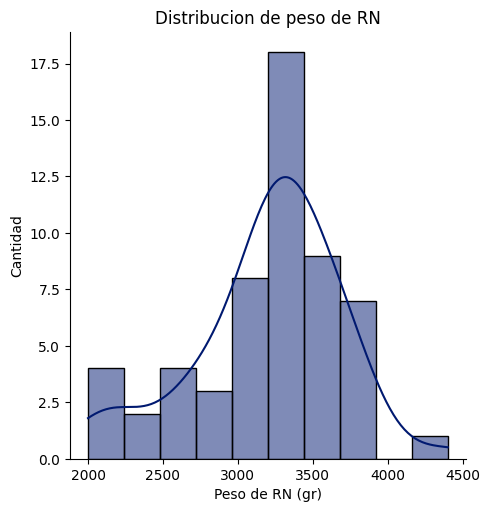

In [ ]:
sns.displot(step6['Peso RN'], kde=True, color='#001970')
plt.xlabel('Peso de RN (gr)')
plt.ylabel('Cantidad')
plt.title('Distribucion de peso de RN')
plt.savefig('Distribucion por peso RN.png')

In [ ]:
# Analisis de distribucion de las variables.  Son variables cuantitativas. 
# Como el N es bajo, utilizare la prueba de Shapiro-Wilk

import scipy.stats as stats
from scipy import stats
from scipy import interpolate

incr_peso = step6['promedio_incr_peso']
pesoRN = step6['Peso RN']


In [ ]:
# Test de normalidad de Shapiro-Wilk
stat, p = stats.shapiro(incr_peso)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Shapiro-Wilk:
Statistic : 0.8900, p-value :   0.000099


In [ ]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [ ]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [ ]:
# Test de normalidad de Shapiro-Wilk
stat, p = stats.shapiro(pesoRN)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p:10f}')

Shapiro-Wilk:
Statistic : 0.9457, p-value :   0.013768


In [ ]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [ ]:
hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


<AxesSubplot:xlabel='promedio_incr_peso', ylabel='Peso RN'>

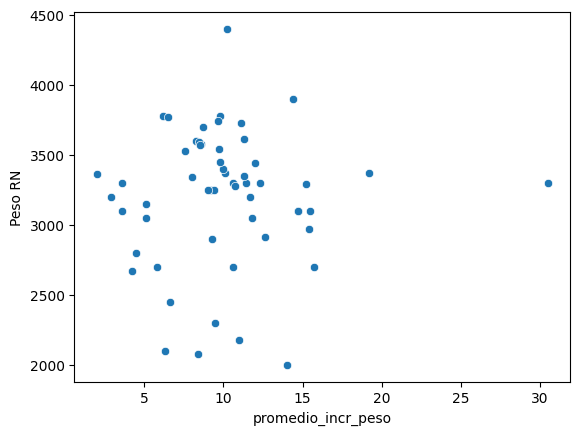

In [ ]:
sns.scatterplot(x='promedio_incr_peso', y='Peso RN', data=step6)

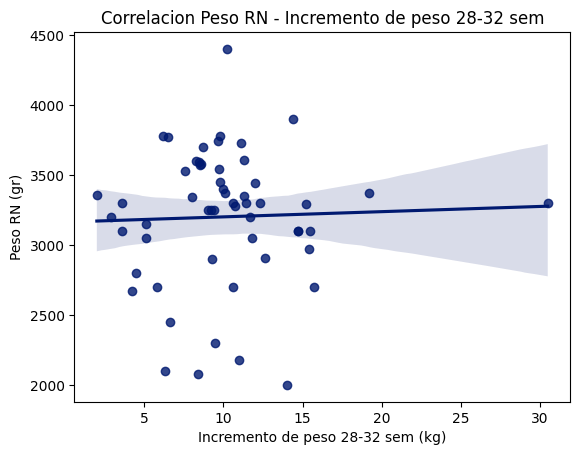

In [ ]:
sns.regplot(x='promedio_incr_peso', y='Peso RN', data=step6, color='#001970')
plt.xlabel('Incremento de peso 28-32 sem (kg)')
plt.ylabel('Peso RN (gr)')
plt.title('Correlacion Peso RN - Incremento de peso 28-32 sem')
plt.savefig('Correlacion peso RN incr peso materno.png')

In [ ]:
stats.spearmanr(step6['promedio_incr_peso'],step6['Peso RN'])

SpearmanrResult(correlation=0.0012484610383727327, pvalue=0.9927138927336411)

In [ ]:
step6.corr(method="spearman")

,promedio_incr_peso,Peso RN
promedio_incr_peso,1.000000,0.001248
Peso RN,0.001248,1.000000


<AxesSubplot:>

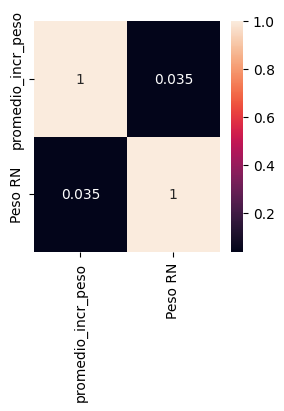

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(step6.corr(), annot=True)